# Notebook corresponding to case studies taken from MaveDB

In [1]:
from pathlib import Path

In [2]:
import os
base_path = Path("/cta/share/users/MaveDB")
os.listdir(base_path)

['main.json',
 'LICENSE.txt',
 'mavedb-dump.20241114101443.zip',
 'csv',
 'README.md']

In [3]:
import json
with open(base_path / "main.json") as f:
    header_data = json.load(f)

In [11]:
header_data["experimentSets"][3]["experiments"][0]

{'title': 'Deep mutational scan of E4B (Ube4b) U-box domain auto-ubiquitination',
 'shortDescription': 'Deep mutational scan of the murine E4B (Ube4b) U-box domain using a phage display auto-ubiquitination assay.',
 'abstractText': 'This study identified multiple gain-of-function mutations in the ubiquitination factor E4B U-box domain by measuring auto-ubiquitination in a phage display system. E4B is an E3 ligase, responsible for transferring a ubiquitin from an E2 ligase to the target (in this case the phage displaying E4B). Many of these mutations are not specific to one E2 enzyme and so may be generalizable for mutiple E2s and E3s.',
 'methodText': 'The variant library was constructed using doped oligo synthesis, with a 2% error rate, corresponding to 0.225% of incorporating each incorrect base at each position. The phage display was performed using T7 phage and selected for Flag-Ub binding to anti-Flag beads. Full-length variant sequences were associated with 18-base DNA barcodes u

In [5]:
data_fname = header_data["experimentSets"][0]["experiments"][0]["scoreSets"][0]["urn"]
dna_seq = "ATGTCGGGGATCGCCCTCAGCAGACTCGCCCAGGAGAGGAAAGCATGGAGGAAAGACCACCCATTTGGTTTCGTGGCTGTCCCAACAAAAAATCCCGATGGCACGATGAACCTCATGAACTGGGAGTGCGCCATTCCAGGAAAGAAAGGGACTCCGTGGGAAGGAGGCTTGTTTAAACTACGGATGCTTTTCAAAGATGATTATCCATCTTCGCCACCAAAATGTAAATTCGAACCACCATTATTTCACCCGAATGTGTACCCTTCGGGGACAGTGTGCCTGTCCATCTTAGAGGAGGACAAGGACTGGAGGCCAGCCATCACAATCAAACAGATCCTATTAGGAATACAGGAACTTCTAAATGAACCAAATATCCAAGACCCAGCTCAAGCAGAGGCCTACACGATTTACTGCCAAAACAGAGTGGAGTACGAGAAAAGGGTCCGAGCACAAGCCAAGAAGTTTGCGCCCTCATAA"

# data_fname = header_data["experimentSets"][0]["experiments"][1]["scoreSets"][0]["urn"]
# dna_seq = "ATGTCTGACCAGGAGGCAAAACCTTCAACTGAGGACTTGGGGGATAAGAAGGAAGGTGAATATATTAAACTCAAAGTCATTGGACAGGATAGCAGTGAGATTCACTTCAAAGTGAAAATGACAACACATCTCAAGAAACTCAAAGAATCATACTGTCAAAGACAGGGTGTTCCAATGAATTCACTCAGGTTTCTCTTTGAGGGTCAGAGAATTGCTGATAATCATACTCCAAAAGAACTGGGAATGGAGGAAGAAGATGTGATTGAAGTTTATCAGGAACAAACGGGGGGTCATTCAACAGTTTAG"



data_fname = f"urn-mavedb-{data_fname.split(":")[2]}.scores.csv"
data_path = base_path / f"csv/{data_fname}"
data_path

PosixPath('/cta/share/users/MaveDB/csv/urn-mavedb-00000001-a-1.scores.csv')

In [6]:
from Bio.Seq import Seq
target_seq = Seq(dna_seq).translate()
target_seq.__str__()

'MSGIALSRLAQERKAWRKDHPFGFVAVPTKNPDGTMNLMNWECAIPGKKGTPWEGGLFKLRMLFKDDYPSSPPKCKFEPPLFHPNVYPSGTVCLSILEEDKDWRPAITIKQILLGIQELLNEPNIQDPAQAEAYTIYCQNRVEYEKRVRAQAKKFAPS*'

In [7]:
import pandas as pd
df = pd.read_csv(data_path)
df.head()

,accession,hgvs_nt,hgvs_splice,hgvs_pro,score,sd,se,exp.score,exp.sd,df,pred.score
0,urn:mavedb:00000001-a-1#1,NaN,NaN,p.Pro73Gln,-0.026176,0.099692,0.031525,-0.027539,0.060456,10.0,-0.000884
1,urn:mavedb:00000001-a-1#2,NaN,NaN,p.Tyr137Val,-0.115652,0.136544,0.068272,-0.129011,0.074346,4.0,0.011848
2,urn:mavedb:00000001-a-1#3,NaN,NaN,p.Val27Asp,-0.063647,0.136050,0.043023,-0.072944,0.092375,10.0,0.049276
3,urn:mavedb:00000001-a-1#4,NaN,NaN,p.Lys14Ser,0.104183,0.136637,0.068319,0.095263,0.077993,4.0,0.185334
4,urn:mavedb:00000001-a-1#5,NaN,NaN,p.Pro73Cys,0.623095,0.110426,0.055213,0.626280,0.055806,4.0,0.582596


In [8]:
from Bio.Data.IUPACData import protein_letters_3to1
# Convert a string like p.Pro73Gln (HGVS Nomenclature) to (72, x, x) 
# -1 position due to zero-indexing.
def to_mutation_tuple(p_string):
    p_string = p_string[2:]
    first_letter = protein_letters_3to1[p_string[:3]]
    second_letter = protein_letters_3to1[p_string[-3:]]
    pos = int(p_string[3:-3])
    return (pos - 1, first_letter, second_letter)
to_mutation_tuple("p.Pro73Gln")

(72, 'P', 'Q')

In [9]:
# Filter the mutations that do not change the aminoacid sequence
df = df[~df["hgvs_pro"].str.contains("=")]
# Change notation
df["mutations"] = df["hgvs_pro"].apply(to_mutation_tuple)
df

,accession,hgvs_nt,hgvs_splice,hgvs_pro,score,sd,se,exp.score,exp.sd,df,pred.score,mutations
0,urn:mavedb:00000001-a-1#1,NaN,NaN,p.Pro73Gln,-0.026176,0.099692,0.031525,-0.027539,0.060456,10.0,-0.000884,"(72, P, Q)"
1,urn:mavedb:00000001-a-1#2,NaN,NaN,p.Tyr137Val,-0.115652,0.136544,0.068272,-0.129011,0.074346,4.0,0.011848,"(136, Y, V)"
2,urn:mavedb:00000001-a-1#3,NaN,NaN,p.Val27Asp,-0.063647,0.136050,0.043023,-0.072944,0.092375,10.0,0.049276,"(26, V, D)"
3,urn:mavedb:00000001-a-1#4,NaN,NaN,p.Lys14Ser,0.104183,0.136637,0.068319,0.095263,0.077993,4.0,0.185334,"(13, K, S)"
4,urn:mavedb:00000001-a-1#5,NaN,NaN,p.Pro73Cys,0.623095,0.110426,0.055213,0.626280,0.055806,4.0,0.582596,"(72, P, C)"
...,...,...,...,...,...,...,...,...,...,...,...,...
3174,urn:mavedb:00000001-a-1#3175,NaN,NaN,p.Phe77Pro,-0.035700,0.083848,0.026515,-0.035873,0.046207,10.0,-0.031487,"(76, F, P)"
3175,urn:mavedb:00000001-a-1#3176,NaN,NaN,p.Pro72Gln,0.506088,0.117671,0.058836,0.514990,0.059071,4.0,0.399164,"(71, P, Q)"
3176,urn:mavedb:00000001-a-1#3177,NaN,NaN,p.Met62Cys,0.377367,0.354789,0.354789,NaN,NaN,NaN,0.377367,"(61, M, C)"
3178,urn:mavedb:00000001-a-1#3179,NaN,NaN,p.Val148Ala,0.510032,0.160165,0.040041,0.515248,0.127692,16.0,0.452056,"(147, V, A)"


In [10]:
df["mutations"].to_list()[:5]

[(72, 'P', 'Q'),
 (136, 'Y', 'V'),
 (26, 'V', 'D'),
 (13, 'K', 'S'),
 (72, 'P', 'C')]

# Apply segmentation

In [80]:
import numpy as np
from tokenizers import Tokenizer
from vocabulary_functions import calc_dice_from_encodings

In [81]:
tkz_path = "/cta/share/users/mutbpe/tokenizers/blosum62/hf_uniref50_bpe_51200.json"
tkz1 = Tokenizer.from_file(tkz_path)
tkz_path = "/cta/share/users/mutbpe/tokenizers/blosum62/hf_uniref50_mutbpe_0.7_3_12_0.05_51200.json"
tkz2 = Tokenizer.from_file(tkz_path)

In [82]:
main_encoding1 = tkz1.encode(str(target_seq))
main_encoding2 = tkz2.encode(str(target_seq))

In [83]:
dice_scores1 = []
dice_scores2 = []
for pos, fst, snd in df["mutations"].to_list():
    sq = str(target_seq)
    mutated_seq = sq[:pos] + snd + sq[pos+1:]
    mutated_encoding = tkz1.encode(mutated_seq)
    score = calc_dice_from_encodings([main_encoding1, mutated_encoding])
    dice_scores1.append(score)
for pos, fst, snd in df["mutations"].to_list():
    sq = str(target_seq)
    mutated_seq = sq[:pos] + snd + sq[pos+1:]
    mutated_encoding = tkz2.encode(mutated_seq)
    score = calc_dice_from_encodings([main_encoding2, mutated_encoding])
    dice_scores2.append(score)

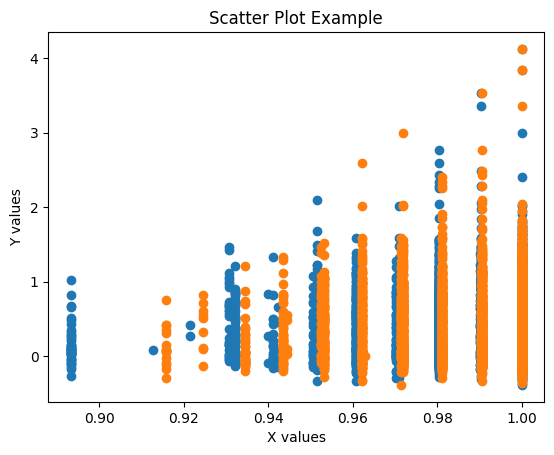

In [84]:
import matplotlib.pyplot as plt

plt.scatter(dice_scores1, df["score"].to_list())
plt.scatter(dice_scores2, df["score"].to_list())

plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Scatter Plot Example')

# Show the plot
plt.show()


In [85]:
fitness_scores = df["score"].to_numpy()
dice_scores1 = np.array(dice_scores1)
dice_scores2 = np.array(dice_scores2)

len(dice_scores1[(fitness_scores > 1) & (dice_scores1 > 0.95)])
len(dice_scores2[(fitness_scores > 1) & (dice_scores2 > 0.95)])

356

In [86]:
from vocabulary_functions import get_family_dictionary, get_mutated, get_parents
import json 

vocab_path = "/cta/share/users/mutbpe/tokenizers/blosum62/uniref50_bpe_51200.json"
# vocab_path = "/cta/share/users/mutbpe/tokenizers/blosum62/uniref50_mutbpe_0.7_3_12_0.05_51200.json"

with open(vocab_path) as f:
    vocab = json.load(f)

all_tokens = list(vocab.keys())
mutated_seqs = []
mut_list = df["mutations"].to_list()
sc_list = df["score"].to_list()
for pos, fst, snd in mut_list:
    sq = str(target_seq)
    mutated_seq = sq[:pos] + snd + sq[pos+1:]
    mutated_seqs.append(mutated_seq)

In [90]:
for i in range(len(mut_list)):
    pos, _, _ = mut_list[i]
    mutseq = mutated_seqs[i]

    mutmer = mutseq[pos-1:pos+2]
    ormer = sq[pos-1:pos+2]

    l1 = len(list(filter(lambda t: mutmer in t, all_tokens)))
    l2 = len(list(filter(lambda t: ormer in t, all_tokens)))
    if sc_list[i] < -0.2:
        print(f"Number of tokens before: {l2}, after: {l1}, score: {sc_list[i]}, mutmer: {mutmer}, ormer: {ormer}")

Number of tokens before: 7, after: 28, score: -0.233353658027674, mutmer: LRH, ormer: LFH
Number of tokens before: 25, after: 3, score: -0.218701879142312, mutmer: CHS, ormer: CLS
Number of tokens before: 0, after: 32, score: -0.329218629048203, mutmer: YTS, ormer: YPS
Number of tokens before: 45, after: 41, score: -0.387684489142223, mutmer: GVL, ormer: GGL
Number of tokens before: 16, after: 13, score: -0.245814406601465, mutmer: FYP, ormer: FHP
Number of tokens before: 18, after: 18, score: -0.205317974242311, mutmer: TKK, ormer: TIK
Number of tokens before: 28, after: 23, score: -0.215532231830538, mutmer: GRP, ormer: GTP
Number of tokens before: 9, after: 25, score: -0.235366338367498, mutmer: EKN, ormer: EPN
Number of tokens before: 5, after: 50, score: -0.367961603384457, mutmer: PSE, ormer: PWE
Number of tokens before: 14, after: 28, score: -0.291792884839761, mutmer: VFL, ormer: VCL
Number of tokens before: 39, after: 21, score: -0.210782009168823, mutmer: LTI, ormer: LGI
Numb